In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import optimize
from scipy.signal import savgol_filter

In [2]:
# helper functions

def test_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]




7.368421052631579
[521.3580265092512, 0.8527180059743724, -1.1727206333087026, -575.5753986366221]
[174.28369182649038, 0.914689070145756, -1.5179269042461137, -618.5985851359669]


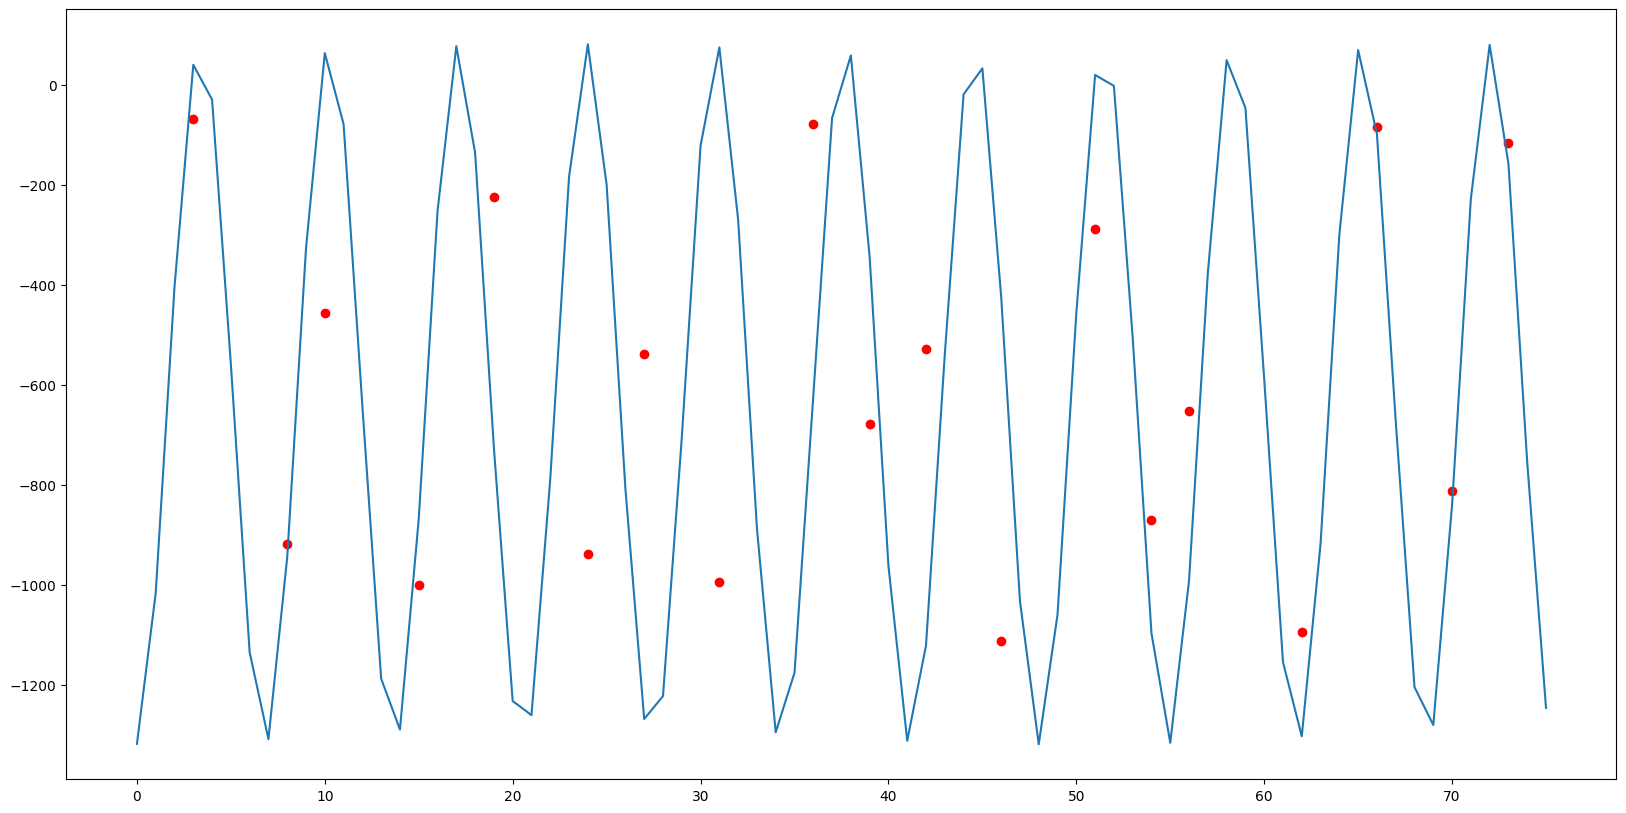

In [3]:
# Curve Fitting Unit Test (Failed, see next code box)

series, num_frames = load_series('..\\time_series\\scale_normalized\\WS-O1-F0-B1-S7-L0-L-0018.csv')

#x = np.arange(0, num_frames)
y = series['left_heel_y']

fig = plt.figure(figsize=(20, 10))
#plt.plot(x, y)

extrema = []
extreme_values = []

for i in range(1, num_frames-1):
    if (y[i] > y[i-1] and y[i] > y[i+1]):
        extrema.append(i)
        extreme_values.append(y[i])
    elif (y[i] < y[i-1] and y[i] < y[i+1]):
        extrema.append(i)
        extreme_values.append(y[i])

    
difference_sum = 0.0
for i in range(1, len(extrema)):
    difference_sum += (extrema[i] - extrema[i-1])

difference_sum /= len(extrema)
difference_sum *= 2
print(difference_sum)

init_amplitude = (max(y) - min(y)) / 2
init_period = 2 * np.pi / (difference_sum)
init_constant = np.mean(y)
init_offset = -1 * 1.0 / init_period

print([init_amplitude, init_period, init_offset, init_constant])
guess = [init_amplitude, init_period, init_offset, init_constant]
params, params_covariance = optimize.curve_fit(test_func, extrema, extreme_values, p0=guess)

print(list(params))
x = np.arange(0, num_frames)

plt.plot(x, test_func(x, 700, params[1], params[2], params[3]))
plt.scatter(extrema, extreme_values, color='red')
plt.show()

[100, 0.33963163822592357, -2.9443664472000637, -898.4172179631604]
[101.16269924069266, 0.3295524305911764, -1.827907820681473, -500.32766227998883]


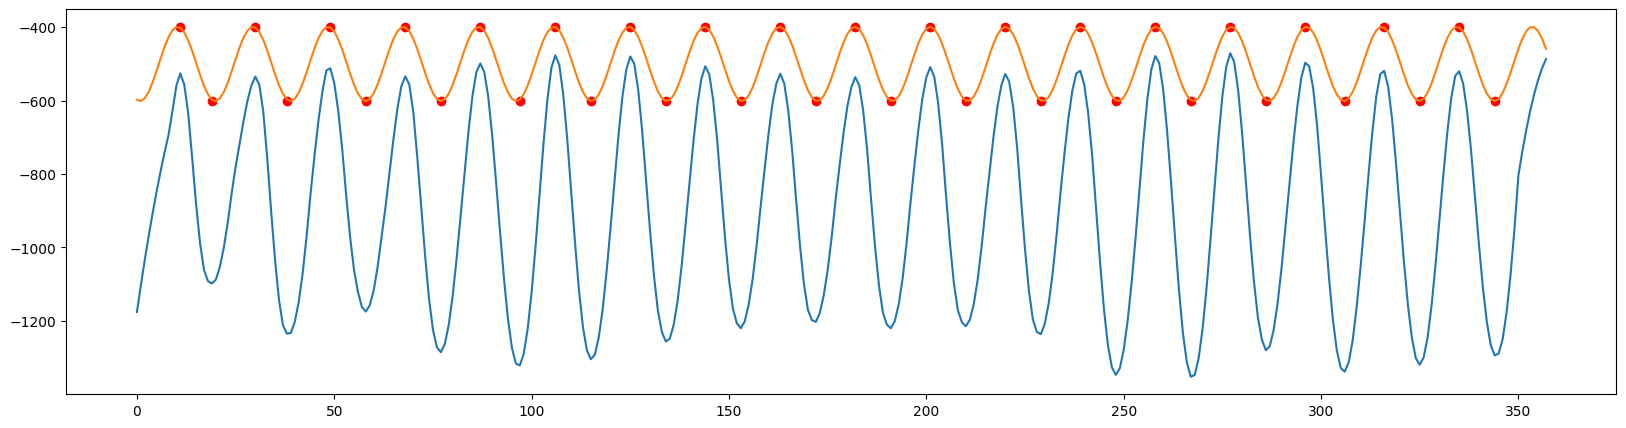

In [19]:
series, num_frames = load_series('..\\time_series\\scale_normalized\\WS-O1-F0-B3-S3-L0-R-0094.csv')

x = np.arange(0, num_frames)
y = savgol_filter(series['left_heel_y'], window_length=15, polyorder=2)

fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(x, y)

extrema = []
extreme_values = []

for i in range(1, num_frames-1):
    if (y[i] > y[i-1] and y[i] > y[i+1]):
        extrema.append(i)
        extreme_values.append(-400)
    elif (y[i] < y[i-1] and y[i] < y[i+1]):
        extrema.append(i)
        extreme_values.append(-600)

    
difference_sum = 0.0
for i in range(1, len(extrema)):
    difference_sum += (extrema[i] - extrema[i-1])

difference_sum /= len(extrema)
difference_sum *= 2

init_amplitude = 100
init_period = 2 * np.pi / (difference_sum)
init_constant = np.mean(y)
init_offset = -1 * 1.0 / init_period

print([init_amplitude, init_period, init_offset, init_constant])
guess = [init_amplitude, init_period, init_offset, init_constant]
params, params_covariance = optimize.curve_fit(test_func, extrema, extreme_values, p0=guess)

print(list(params))
x = np.arange(0, num_frames)

plt.plot(x, test_func(x, params[0], params[1], params[2], params[3]))
plt.scatter(extrema, extreme_values, color='red')
plt.show()